In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Libraries
import numpy as np 
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from keras.layers import Conv1D, BatchNormalization, GlobalAveragePooling1D, Permute, Dropout, Input, Dense, LSTM, concatenate, Activation,  Bidirectional, Model, AvgPool1D, Flatten
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc

In [ ]:
#Data Loading and Formation of X,y
X_tr = pd.read_csv('/content/drive/My Drive/roc test/Own_Training.csv')
Y_train = X_tr['class'].astype('category').cat.codes
X_te = pd.read_csv('/content/drive/My Drive/roc test/Own_Test.csv')
Y_test = X_te['class'].astype('category').cat.codes
X_val = pd.read_csv('/content/drive/My Drive/roc test/Own_Validation.csv')
Y_val = X_val['class'].astype('category').cat.codes
X_te = X_te.drop(['class'], axis=1)
X_tr = X_tr.drop(['class'], axis = 1)
X_val = X_val.drop(['class'], axis = 1)

#Bool to enable feature selection depending on dataset; only combined dataset does not use feature selection
feature_sel = True
#Initializing scaler
scaler = StandardScaler()

#Option to use feature selection
if feature_sel:
  X_tr = X_tr[['y15', 'c17', 'y14', 'c10', 'c11', 'y11', 'y10', 'x13', 'x9', 'x7', 'x11', 'y13', 'y12', 'x5', 'x15', 'x3', 'x1', 'x12', 'x2', 'x4', 'x6', 'x17', 'x10', 'x8', 'x14', 'x16']]
  X_val = X_val[['y15', 'c17', 'y14', 'c10', 'c11', 'y11', 'y10', 'x13', 'x9', 'x7', 'x11', 'y13', 'y12', 'x5', 'x15', 'x3', 'x1', 'x12', 'x2', 'x4', 'x6', 'x17', 'x10', 'x8', 'x14', 'x16']]
  X_te = X_te[['y15', 'c17', 'y14', 'c10', 'c11', 'y11', 'y10', 'x13', 'x9', 'x7', 'x11', 'y13', 'y12', 'x5', 'x15', 'x3', 'x1', 'x12', 'x2', 'x4', 'x6', 'x17', 'x10', 'x8', 'x14', 'x16']]

#Scale the data based on training set
scaler.fit(X_tr)

#Transform the training, validation, test sets based on parameters obtained from training set
X_train = scaler.transform(X_tr)

X_val = scaler.transform(X_val)

X_test = scaler.transform(X_te)

(100883,)
(7368,)
(7392,)


In [ ]:
#Model
model = models.Sequential()
model.add(layers.Conv1D(filters=32, kernel_size=5, padding = "same" , input_shape=(X_train.shape[1], 1)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=32, kernel_size=5, padding = "same"))
model.add(layers.AvgPool1D(2))
model.add(layers.Conv1D(filters=32, kernel_size=5, padding = "same"))
model.add(layers.AvgPool1D(2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

opt = tf.keras.optimizers.Adam(0.0001)

model.compile(opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train,
          epochs=50, 
          batch_size=128,
          validation_data=(X_test, Y_test),
          verbose=1,
          shuffle= True)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 51, 1)]      0           []                               
                                                                                                  
 permute_2 (Permute)            (None, 1, 51)        0           ['input_3[0][0]']                
                                                                                                  
 conv1d_2 (Conv1D)              (None, 1, 64)        26176       ['permute_2[0][0]']              
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 1, 64)       256         ['conv1d_2[0][0]']               
 rmalization)                                                                               

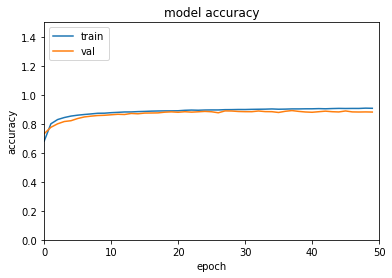

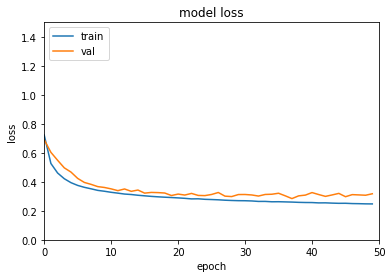

231/231 [==============================] - 2s 6ms/step


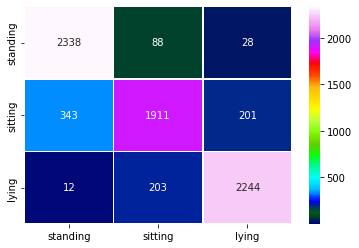

Classifcation Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      2454
           1       0.87      0.78      0.82      2455
           2       0.91      0.91      0.91      2459

    accuracy                           0.88      7368
   macro avg       0.88      0.88      0.88      7368
weighted avg       0.88      0.88      0.88      7368



In [ ]:
#Plot Acc Graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0,1.5))
plt.xlim((0,50))
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Plot Loss Graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((0,1.5))
plt.xlim((0,50))
plt.legend(['train', 'val'], loc='upper left')
plt.show()


#Confusion Matrix and Report
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_val))))

cf = confusion_matrix(Y_val, y_pred)
labels=['standing','sitting','lying']
ax = sns.heatmap(cf,cmap="gist_ncar",vmin=0.5, linewidth=0.5, annot=True, fmt="d",xticklabels =labels,yticklabels =labels)

plt.show()

clr = classification_report(Y_val, y_pred)

print('Classifcation Report:\n', clr)

In [ ]:
#Obtain test set metrics
model.evaluate(X_test, Y_test)

231/231 [==============================] - 1s 6ms/step - loss: 0.4008 - accuracy: 0.8655


[0.4008452296257019, 0.8655303120613098]

In [ ]:
#ROC Score
y_pred = model.predict(X_test)
roc_auc_score(Y_test, y_pred,multi_class="ovr")

231/231 [==============================] - 2s 10ms/step


0.972278506912358

231/231 [==============================] - 1s 6ms/step
0.9884821067237094
0.9578454578559623
0.9705079561574024


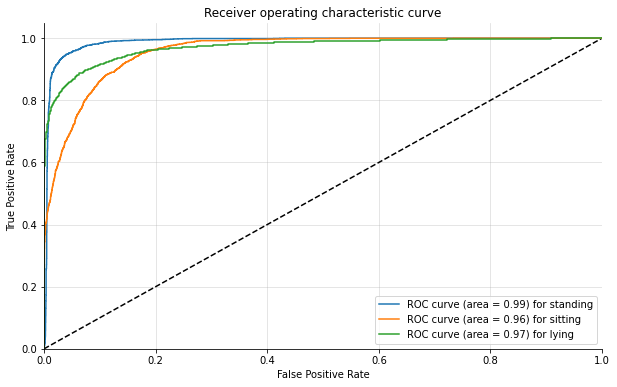

In [ ]:
#Plot ROC Curve
def plot_multiclass_roc(model, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = model.predict(X_test)
    classy = ['standing', 'sitting', 'lying']
    #Structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #Roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic curve')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for %s' % (roc_auc[i], classy[i]))
        print(roc_auc[i])
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.savefig('roc.png')
    plt.show()
      

plot_multiclass_roc(model, X_test, Y_test, n_classes=3, figsize=(10,6))


In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

# Save the model.
with open('combined.tflite', 'wb') as f:
  f.write(tflite_model)